In [4]:
import scipy.stats as stats
from matplotlib import pyplot
import itertools
import numpy as np

Множественное сравнение

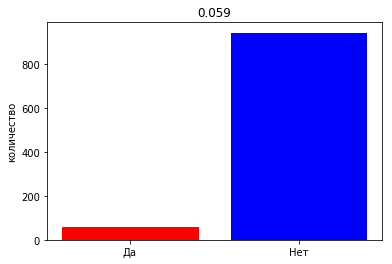

In [7]:
M = 0
D = 1

def ttest(a , b):
    se = np.sqrt( a['SD']**2/a['N'] + b['SD']**2/b['N']  )
    t = (a['Mx'] - b['Mx'])/se
    dfreedom = a['N'] + b['N'] - 2
    return stats.t.sf(np.abs(t), dfreedom)*2

# n - элементов в выборке
# m - количество выборок
# a -  вероятность
def false_alarm(m, n, a):
    trys = 1000 # количество экспериментов
    hist = {'Да':0, 'Нет':0} # результаты сравнений     
    data = list(range(m)) # инициализация групп с выборками
    
    # запускаем trys экспериментов
    for i in range(trys):
        
        # наполняем m выборок, для ускорения сразу их агрегируем по SD, Mx, N
        for j in range(m):
            dt = stats.norm.rvs(loc=M, scale=D, size=n)
            data[j] = {'SD':np.std(dt, ddof = 1), 'Mx':np.mean(dt), 'N':n}
        
        #сравниваем выборки по 2 группы, перебор можно реализовать с помощью двух циклов или воспользоваться itertools
        for first, second in itertools.combinations(data, 2):
            if ttest(first, second) <= a:
                hist['Да']+=1
                break
        else:
            hist['Нет']+=1

    # рисуем гитограмму частот
    barlist = pyplot.bar(hist.keys(), hist.values(), color='b')
    barlist[0].set_color('r')
    pyplot.title(round(hist['Да'] / trys,3))
    pyplot.ylabel('количество')
    pyplot.show()
    

false_alarm(2,30,0.05)

Многофакторный анализ

In [8]:
import pandas as pd
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

URL = 'https://stepik.org/media/attachments/lesson/9250/birds.csv'
data = pd.read_csv(URL)

formula = 'var4 ~ C(hormone) + C(sex) + C(hormone):C(sex)'
model = ols(formula, data).fit()
aov_table = anova_lm(model, typ=2)
print(aov_table)

                       sum_sq    df         F    PR(>F)
C(hormone)           0.847472   1.0  0.086528  0.769653
C(sex)               0.119762   1.0  0.012228  0.912318
C(hormone):C(sex)   89.483384   1.0  9.136390  0.003682
Residual           587.650394  60.0       NaN       NaN


Корреляция

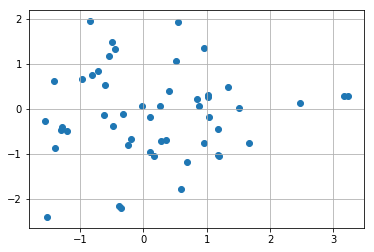

data: x and y
t = 2.06697, df = 48, p-value = 0.04415
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
[0.00819306 0.52264617]
sample estimates:
cor
0.2858888


In [9]:
from scipy import stats
import matplotlib.pyplot as plt

def cortest(corr, lenX):
    #t value
    t = corr[0] * ((len(X) - 2) / (1 - corr[0]**2))**0.5
    print("data: x and y")
    print("t = {}, df = {}, p-value = {}".format(round(t,5), len(X)-2, round(stats.t.sf(np.abs(t), 48)*2,5)))

    # Use the Fisher transformation to get z
    z = np.arctanh(corr[0])
    #print("z value: {}".format(z))

    # And, the sigma value i.e standard error
    sigma = (1/((len(X)-3)**0.5))
    #print("sigma value: {}".format(sigma))

    # Get normal 95% interval probability density function for normal continuous random variable apply two-sided conditional formula
    cint = z + np.array([-1, 1]) * sigma * stats.norm.ppf((1+0.95)/2)
    
    #Finally take hyperbolic tangent to get interval values for 95%
    interval = np.tanh(cint)
    
    if corr != 0:
        print("alternative hypothesis: true correlation is not equal to 0")
    print("95 percent confidence interval:")
    print(interval)
    print("sample estimates:")
    print("cor")
    print(corr[0])

# так вычисляем корреляцию
X = stats.norm.rvs(loc=0, scale=1, size=50)
Y = stats.norm.rvs(loc=0, scale=1, size=50)
corr = stats.pearsonr(X, Y)

# так строим scatter plot
plt.scatter(X,Y)
plt.grid()
plt.show()

#print("correlation: {}".format(corr))

#т.к. из лекции мы не знаем выборки, то сразу подставляем корреляцию из лекции
cortest((0.2858888,), 50)

In [10]:
from scipy.stats import stats

A = """X Y
4 2
5 1
2 4
3 3
1 5"""

x, y = [], []

[(x.append(int(a[0])), y.append(int(a[2]))) for a in A.split('\n') if a[0].isdigit()]

print(stats.pearsonr(x,y)[0])

-1.0


или

In [11]:
import numpy
list1 = [4,5,2,3,1]
list2 = [2,1,4,3,5]
numpy.corrcoef(list1, list2)[0, 1]

-0.9999999999999999

регрессия

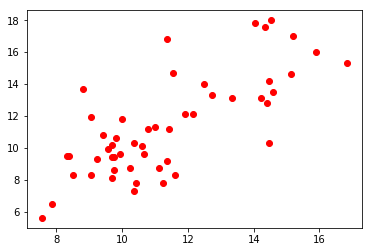

b1------> -0.6212167177940103
b0------> 64.78096577010206
cov-----> -431.2194117647056
Rxy-----> -0.7468582531582505
Sdx-----> 26.346782368563915
SDy-----> 21.91454884272985
X_mean--> 86.01176470588233
y_mean--> 11.349019607843138


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

url = 'http://d396qusza40orc.cloudfront.net/statistics/lec_resources/states.csv'
df = pd.read_csv(url)
X = df['hs_grad']
y = df['poverty']

X_mean = X.mean()
y_mean = y.mean()

SDx = np.sqrt(sum([(i-X_mean)**2 for i in X]))
SDy = np.sqrt(sum([(i-y_mean)**2 for i in y]))

cov = sum([(i-X_mean)*(j-y_mean) for i, j in zip(X, y)])

Rxy = cov/(SDx*SDy)

b1 = (SDy/SDx) * Rxy
b0 = y_mean - X_mean*b1

def predictor(x):
    y = b0 + b1*x
    return y
    
ploter = [predictor(i) for i in X]
plt.plot(ploter, y , 'ro')
plt.show()
print('b1------>', b1)
print('b0------>', b0)
print('cov----->', cov)
print('Rxy----->', Rxy)
print('Sdx----->', SDx)
print('SDy----->', SDy)
print('X_mean-->', X_mean)
print('y_mean-->', y_mean)

C:\Users\babus\Anaconda3\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


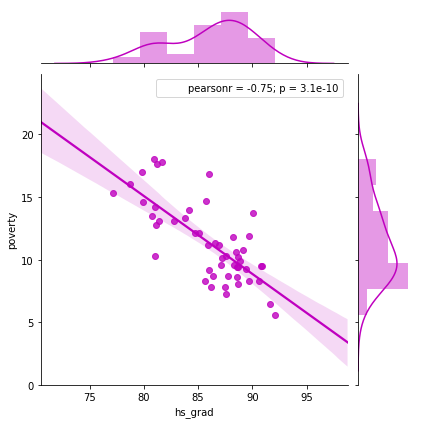

In [6]:
import seaborn as sns
sns.jointplot(x='hs_grad', y='poverty', data=df, kind='reg', color='m')

In [9]:
import numpy as np
import pandas as pd

import statsmodels.formula.api as sm

 
url = 'http://d396qusza40orc.cloudfront.net/statistics/lec_resources/states.csv'
df = pd.read_csv(url)

result = sm.ols(formula="poverty ~ metro_res + white + hs_grad + female_house", data=df).fit()

 

print(result.params)

Intercept       66.476525
metro_res       -0.056323
white           -0.048144
hs_grad         -0.554713
female_house     0.050543
dtype: float64


In [10]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                poverty   R-squared:                       0.642
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     20.58
Date:                Mon, 03 Aug 2020   Prob (F-statistic):           8.88e-10
Time:                        19:36:06   Log-Likelihood:                -103.39
No. Observations:                  51   AIC:                             216.8
Df Residuals:                      46   BIC:                             226.4
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       66.4765     12.590      5.280   

тоже самое, с объяснением

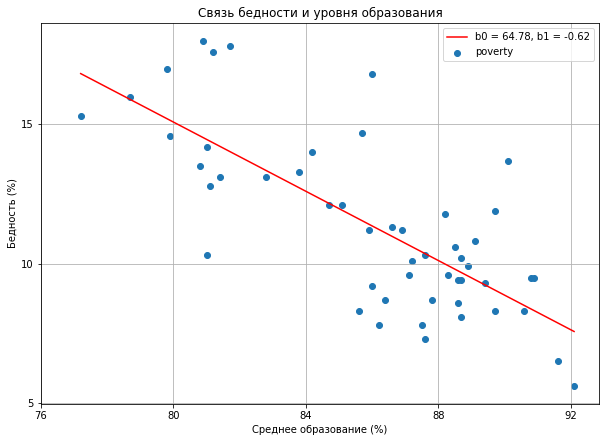

             Estimate      Pr(>|t|)  Std.Error  t value
(Intercept)   64.7810  9.940660e-13     6.8026     9.52
hs_grand      -0.6212  3.108830e-10     0.0790    -7.86

Multiple R-squared: 0.5578,
F-statistic(1,49) = 61.81, p-value = 3.10882981031842e-10


In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np

data=df

# рассчет ковариационной матрицы двух векторов, на выходе ковариация и дисперсии каждого из массивов, 
# или можно рассчитать вручную по формулам из уроков cov - урок 3_1 третье видео; D - урок 1_5 третье видео
X = data['hs_grad']
Y = data['poverty']
ssxm, ssxym, ssyxm, ssym = np.cov(X,Y).flat

# рассчет корреляции по формуле из урока 3_1 третье видео: r = cov/stdx*stdy, 
# т. к. в ковариационной матрице у нас дисперсии, то в знаменателе нужно взять квадратный корень 
if ssxm == 0 or ssym == 0:
    r = 0
else:
    r = ssxym / (ssxm * ssym)**0.5
    
# расчет slope и intercept из урока 3_3 второе видео: slope = (stdy/stdx) * r
slope = r * (ssym/ssxm)**0.5
intercept = np.mean(Y) - slope * np.mean(X)

df = len(X) - 2
# рассчет t - значения, вероятности p и стандартной ошибки для X параметра подсмотренно тут: 
# https://github.com/scipy/scipy/blob/v1.4.1/scipy/stats/_stats_mstats_common.py#L15-L144
tx = r * np.sqrt(df / ((1.0 - r)*(1.0 + r)))
sterrestx = np.sqrt((1 - r**2) * ssym / ssxm / df)
px = 2 * stats.t.sf(np.abs(tx), df)

# Находим сумму квадратов по параметру X
s = [i**2 for i in X]
sterresty = (sterrestx**2/51*sum(s))**0.5

# рассчет t - значения, вероятности p и стандартной ошибки для Y параметра подсмотренно тут: 
# https://en.wikipedia.org/wiki/Simple_linear_regression
ty = intercept/sterresty
py = 2 * stats.t.sf(np.abs(ty), df)

# рассчет F-статистики подсмотренно тут:
# https://www.chem-astu.ru/science/reference/fischer.html
F = r**2/(1-r**2)*df
p_val = stats.f.sf(F, 1, df)

# создаем таблицу как в лекции
ttlinear = pd.DataFrame(data = {
    'Estimate':[round(num, 4) for num in [intercept,slope]], 'Std.Error':[round(num, 4) for num in [sterresty, sterrestx]], 
    't value':[round(num, 2) for num in [ty,tx]], 'Pr(>|t|)':[py,px]}, 
                        index = ['(Intercept)','hs_grand'])

# вычисляем остатки
#residuals = Y - intercept - slope*X

fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(10, 7))

# точечный график
ax1.scatter(X,Y)

# регрессионная прямая
x1=np.linspace(min(X),max(X),51)
y1=intercept + slope*x1
plt.plot(x1,y1,'-r',label='b0 = {}, b1 = {}'.format(round(intercept,2), round(slope,2)))

plt.grid()
plt.title('Связь бедности и уровня образования')
plt.xlabel('Среднее образование (%)')
plt.ylabel('Бедность (%)')
plt.xticks(np.arange(76,93, step=4))
plt.yticks(np.arange(5,18, step=5))
plt.legend(loc='upper right')
plt.show()


print(ttlinear)
print('')
print('Multiple R-squared: {},'.format(round(r**2,4)))
print('F-statistic(1,{}) = {}, p-value = {}'.format(df, round(F,2), p_val))

Множественная регрессия

<IPython.core.display.Javascript object>


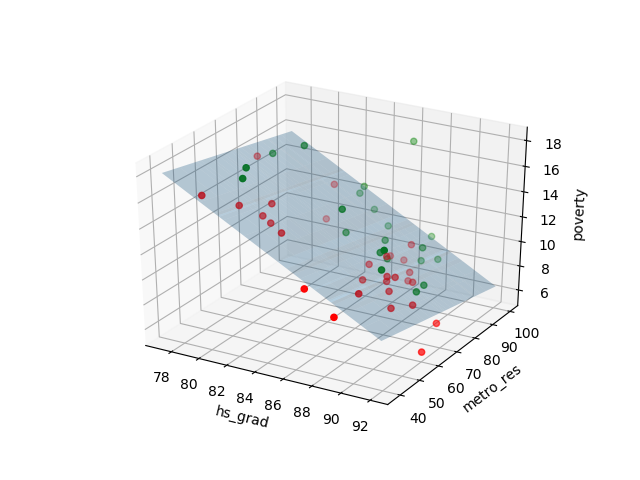

Text(0.5,0,'poverty')

In [13]:
import statsmodels.formula.api as smf
import pandas as pd
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
import numpy as np

%matplotlib notebook

data = pd.read_csv('http://d396qusza40orc.cloudfront.net/statistics/lec_resources/states.csv')

data.head()

lm = smf.ols(formula='poverty ~ metro_res + hs_grad', data=data).fit()

lm.params

def f(x, y):
    return lm.params.Intercept + lm.params.hs_grad * x  + lm.params.metro_res * y

x = data.hs_grad.sort_values()
y = data.metro_res.sort_values()

X, Y = np.meshgrid(x, y)
Z = f(X, Y)

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, alpha=0.3)
data_below_serf = data[data['poverty'] < f(data['hs_grad'], data['metro_res'])]
data_above_serf = data[data['poverty'] >= f(data['hs_grad'], data['metro_res'])]
ax.scatter(data_below_serf.hs_grad, data_below_serf.metro_res, data_below_serf.poverty, c='r', marker='o')
ax.scatter(data_above_serf.hs_grad, data_above_serf.metro_res, data_above_serf.poverty, c='g', marker='o')
ax.set_xlabel('hs_grad')
ax.set_ylabel('metro_res')
ax.set_zlabel('poverty')

<IPython.core.display.Javascript object>


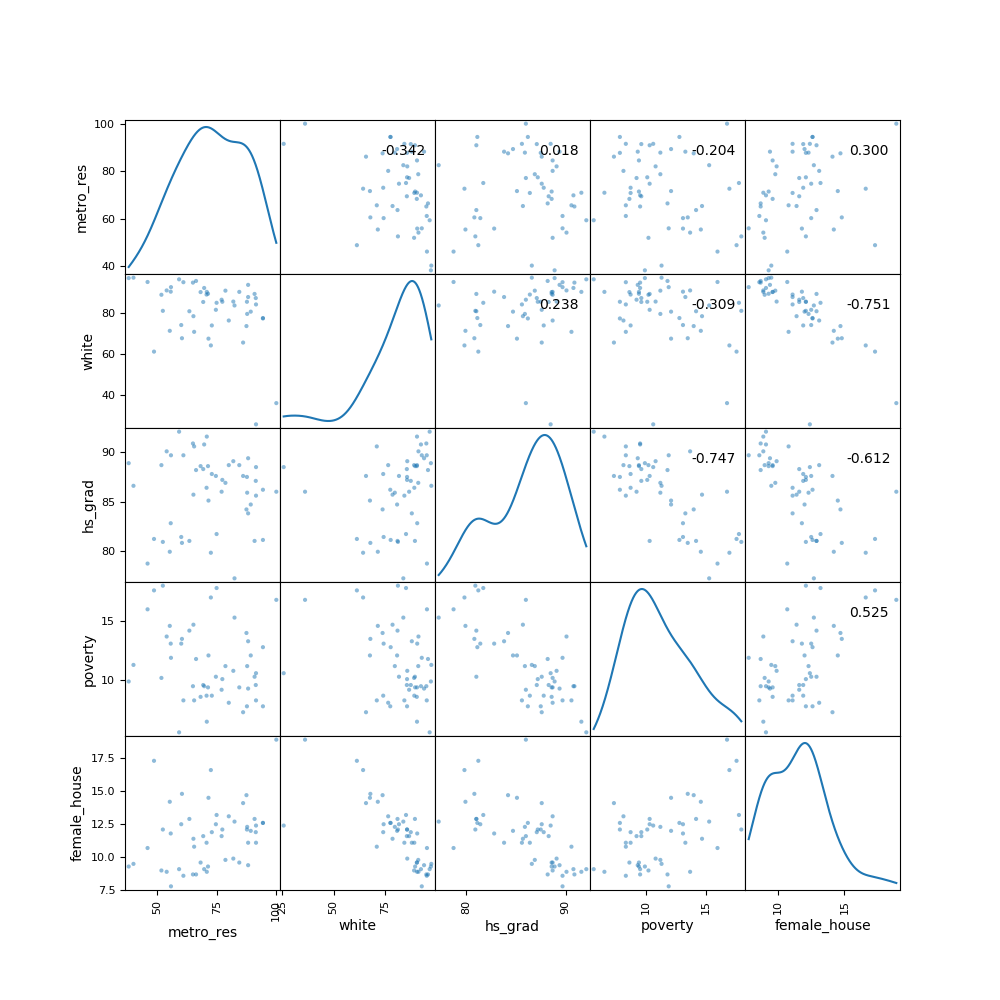

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

data = pd.read_csv(
    'http://d396qusza40orc.cloudfront.net/statistics/lec_resources/states.csv')

axes = pd.plotting.scatter_matrix(data, figsize=(10,10), diagonal='kde', grid=True)
corr = data.corr().values
for i, j in zip(*plt.np.triu_indices_from(axes, k=1)):
    axes[i, j].annotate("%.3f" %corr[i,j], (0.8, 0.8), xycoords='axes fraction', ha='center', va='center')
plt.show()